In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as rg
from scipy.integrate import quad, tplquad
from math import pi, inf
from sympy import limit, integrate
from sympy.abc import x as xx
import time

In [2]:
# Parameters TSB-TI
a = 1/137
c = 1
w = 1
m1 = 1
m2 = 1
e1 = 1
e2 = 16
n1 = 1
n2 = np.sqrt(e2*m2)
theta1 = 0
theta2 = pi
delta = theta1 - theta2


# Parameters Lifetime
# a = 1/137
# c = 1
# m1 = 1
# m2 = m1*(np.sqrt(0.48**2 + 17.3**2)*4*pi*10**(-7) + 1)
# e1 = 1
# eaux = 8.85418782*10**(-12)
# maux = 1.25663706*10**(-6)
# n1 = 1
# n2 = 1.65
# theta1 = 0
# theta2 = pi
# delta = theta1 - theta2
# scale = (600/(2*pi*c))**(-1)
# w = 1
# e2 = 1.65**2/(c**2*m2)


In [3]:
def rho_parall_integrand(theta, z):
    return 3*(np.sin(theta) - (1/2)*np.sin(theta)**3)*(np.sin((w/c)*np.cos(theta)*z)**2)

def rho_perp_integrand(theta, z):
    return 3*(np.sin(theta)**3)*(np.cos((w/c)*(np.cos(theta)*z))**2)

def rho_parall(z): return quad(rho_parall_integrand, 0, pi/2, args=(z,))

def rho_perp(z): return quad(rho_perp_integrand, 0, pi/2, args=(z,))

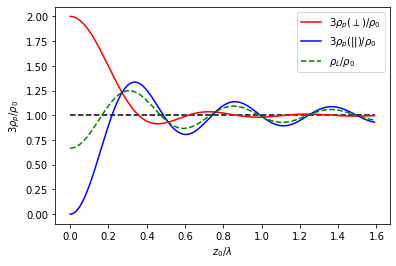

elapsed time: 1.0420207977294922 seg


In [4]:
start = time.time()

x = np.arange(0,10, 0.01)
y_perp = np.array([z[0] for z in list(map(rho_perp, x))])
y_parall = np.array([z[0] for z in list(map(rho_parall, x))])
y_ldos = (y_perp + 2*y_parall)/3

# %%
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x/(2*pi), [1 for z in x], linestyle='--', color= 'black')
perp, = ax.plot(x/(2*pi), y_perp, label=r'$3\rho_p(\perp)/\rho_0$', color= 'red') 
parall, = ax.plot(x/(2*pi), y_parall, label=r'$3\rho_p(||)/\rho_0$', color= 'blue')
ldos, = ax.plot(x/(2*pi), y_ldos, linestyle='--', label=r'$\rho_L/\rho_0$', color= 'green')

ax.legend(handles=[perp, parall, ldos], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

end = time.time()
print('elapsed time: {} seg'.format(end - start))

In [5]:
def f1(theta):
    return m1*m2*(e2*m1 + e1*m2 + n1*n2*(np.sqrt((1-np.sin(theta)**2)/(1-(n1**2/n2**2)*np.sin(theta)**2)) + np.sqrt((1-(n1**2/n2**2)*np.sin(theta)**2)/(1-np.sin(theta)**2))))

def f2(theta):
    return m1*m2*(e2*m1 - e1*m2 + n1*n2*(np.sqrt((1-np.sin(theta)**2)/(1-(n1**2/n2**2)*np.sin(theta)**2)) - np.sqrt((1-(n1**2/n2**2)*np.sin(theta)**2)/(1-np.sin(theta)**2))))

def f3(theta):
    return m1*m2*(e1*m2 - e2*m1 + n1*n2*(np.sqrt((1-np.sin(theta)**2)/(1-(n1**2/n2**2)*np.sin(theta)**2)) - np.sqrt((1-(n1**2/n2**2)*np.sin(theta)**2)/(1-np.sin(theta)**2))))

def R_tmte(theta): 
    return (-2*m2*n1*delta)/(f1(theta) + delta**2)

def R_tmtm(theta): 
    return (f2(theta)+delta**2)/(f1(theta)+delta**2)
 
def R_tete(theta):
    return (f3(theta)+delta**2)/(f1(theta)+delta**2)

def R_tetm(theta):
    return (-2*m2*n1*delta)/(f1(theta) + delta**2)


In [39]:
# Normalization Chanta
def te_factor_integrand(theta):
    return (R_tmte(theta)**2 + R_tete(theta)**2 + 1)/3

def tm_factor_integrand(theta):
    return (R_tetm(theta)**2 + R_tmtm(theta)**2 + 1)/3

te_nfactor = (1/(3))*2*pi*(quad(te_factor_integrand, 0, pi/2)[0])
tm_nfactor = (1/(3))*2*pi*(quad(tm_factor_integrand, 0, pi/2)[0])
print(te_nfactor, tm_nfactor)

1.257415859011392 1.5058797698645923


In [40]:
# Without Normalization Factor
def rho_z_integrand(theta, z): 
    return 3*(n1**3/4)*(np.sin(theta)**3)*((-2*m2*n1*delta)/(f1(theta) + delta**2)**2 + (np.abs(1+np.e**(2j*n1*w*np.cos(theta)*z/c)*(f2(theta)+delta**2)/(f1(theta)+delta**2)))**2)

def rho_x_integrand(theta, z): 
    return 3*(n1**3/4)*(np.sin(theta)*np.cos(theta)**2)*((-2*m2*n1*delta)/(f1(theta) + delta**2)**2 + (np.abs(1-np.e**(2j*n1*w*np.cos(theta)*z/c)*(f2(theta)+delta**2)/(f1(theta)+delta**2)))**2)

def rho_y_integrand(theta, z): 
    return 3*(n1**3/4)*((-2*m2*n1*delta)/(f1(theta) + delta**2)**2 + (np.abs(1+np.e**(2j*n1*w*np.cos(theta)*z/c)*(f3(theta)-delta**2)/(f1(theta)+delta**2)))**2)

def rho_z(z):
    return quad(rho_z_integrand, 0, pi/2, args=(z,))

def rho_x(z):
    return quad(rho_x_integrand, 0, pi/2, args=(z,))

def rho_y(z):
    return quad(rho_y_integrand, 0, pi/2, args=(z,))


In [41]:
# With Normalization Factor
def rho_z_integrand(theta, z): 
    return 3*(n1**3/4)*(np.sin(theta)**3)*((((-2*m2*n1*delta)/(f1(theta) + delta**2))**2)/te_nfactor + ((np.abs(1+np.e**(2j*n1*w*np.cos(theta)*z/c)*(f2(theta)+delta**2)/(f1(theta)+delta**2)))**2)/tm_nfactor)

def rho_x_integrand(theta, z): 
    return 3*(n1**3/4)*(np.sin(theta)*np.cos(theta)**2)*((((-2*m2*n1*delta)/(f1(theta) + delta**2))**2)/te_nfactor + ((np.abs(1-np.e**(2j*n1*w*np.cos(theta)*z/c)*(f2(theta)+delta**2)/(f1(theta)+delta**2)))**2)/tm_nfactor)

def rho_y_integrand(theta, z): 
    return 3*(n1**3/4)*((((-2*m2*n1*delta)/(f1(theta) + delta**2))**2)/te_nfactor + ((np.abs(1+np.e**(2j*n1*w*np.cos(theta)*z/c)*(f3(theta)-delta**2)/(f1(theta)+delta**2)))**2)/tm_nfactor)

def rho_z(z):
    return quad(rho_z_integrand, 0, pi/2, args=(z,))

def rho_x(z):
    return quad(rho_x_integrand, 0, pi/2, args=(z,))

def rho_y(z):
    return quad(rho_y_integrand, 0, pi/2, args=(z,))

In [49]:
print(rho_z(0))
print(rho_x(0))
print(rho_y(0))

(0.5796852137467672, 7.61073083236435e-11)
(0.03203561823041032, 1.2558094278818175e-08)
(0.06102991229738067, 8.600905853677509e-09)


In [53]:
start = time.time()

x = np.arange(0,10, 0.01)
y_perp = np.array([z[0] for z in list(map(rho_z, x))])
y_x = np.array([z[0] for z in list(map(rho_x, x))])
y_y = np.array([z[0] for z in list(map(rho_y, x))])

end = time.time()
print('elapsed time: {} seg'.format(end - start))

elapsed time: 8.769971370697021 seg


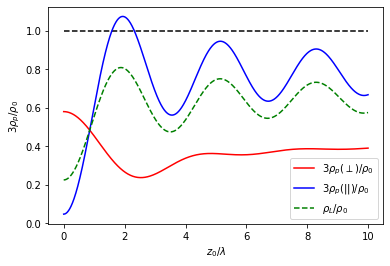

In [54]:
y_parall = (y_y + y_x)/2
y_ldos = (2*y_parall + y_perp)/3

fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x, [1 for z in x], linestyle='--', color= 'black')
perp, = ax.plot(x, y_perp, label=r'$3\rho_p(\perp)/\rho_0$', color= 'red') 
parall, = ax.plot(x, y_parall, label=r'$3\rho_p(||)/\rho_0$', color= 'blue')
ldos, = ax.plot(x, y_ldos, linestyle='--', label=r'$\rho_L/\rho_0$', color= 'green')

ax.legend(handles=[perp, parall, ldos], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

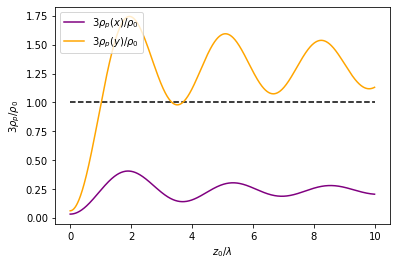

In [55]:
fig, ax = plt.subplots()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

base_line, = ax.plot(x, [1 for z in x], linestyle='--', color= 'black')
perp, = ax.plot(x, y_x, label=r'$3\rho_p(x)/\rho_0$', color= 'purple') 
parall, = ax.plot(x, y_y, label=r'$3\rho_p(y)/\rho_0$', color= 'orange')

ax.legend(handles=[perp, parall], prop={'size': 10})
ax.set_xlabel(r'$z_0/\lambda$')
ax.set_ylabel(r'$3\rho_p/\rho_0$')
plt.show()

In [10]:
# Normalization Purposes functions
def Nf1(nx, ny, nz):
    return m1*m2*(e2*m1 + e1*m2 + n1*n2*(np.sqrt((1-((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))/(1-(n1**2/n2**2)*((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))) + np.sqrt((1-(n1**2/n2**2)*((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))/(1-((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2))))))

def Nf2(nx, ny, nz):
    return m1*m2*(e2*m1 - e1*m2 + n1*n2*(np.sqrt((1-((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))/(1-(n1**2/n2**2)*((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))) - np.sqrt((1-(n1**2/n2**2)*((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))/(1-((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2))))))

def Nf3(nx, ny, nz):
    return m1*m2*(e1*m2 - e2*m1 + n1*n2*(np.sqrt((1-((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))/(1-(n1**2/n2**2)*((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))) - np.sqrt((1-(n1**2/n2**2)*((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2)))/(1-((nx**2 + ny**2)/(nx**2 + ny**2 + nz**2))))))

def NR_tmte(nx, ny, nz): 
    return (-2*m2*n1*delta)/(Nf1(nx, ny, nz) + delta**2)

def NR_tmtm(nx, ny, nz): 
    return (Nf2(nx, ny, nz)+delta**2)/(Nf1(nx, ny, nz)+delta**2)
 
def NR_tete(nx, ny, nz):
    return (Nf3(nx, ny, nz)+delta**2)/(Nf1(nx, ny, nz)+delta**2)

def NR_tetm(nx, ny, nz):
    return (-2*m2*n1*delta)/(Nf1(nx, ny, nz) + delta**2)


In [11]:
def mod_E_tete(nx, ny, nz):
    return NR_tmte(nx, ny, nz)**2 + NR_tete(nx, ny, nz)**2 + 1 + 2*np.cos(2*n1*(nz**2/(nx**2 + ny**2 + nz**2))*(w/c))*NR_tete(nx, ny, nzn

def mod_E_tmtm(nx, ny, nz, z):
    return none*2 + ny**2 + nz**2)



In [ ]:
tplquad(mod_E_tete, 0, L/2, lambda nz: 0, lambda nz: L, lambda nz, ny: 0, lambda nz, ny: L, args=(z,))